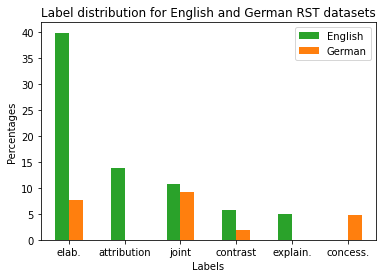

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

# custom reader needed to handle quotechars
def read_df_custom(file):
    header = 'doc     unit1_toks      unit2_toks      unit1_txt       unit2_txt       s1_toks s2_toks unit1_sent      unit2_sent      dir     nuc_children    sat_children    genre   u1_discontinuous        u2_discontinuous       u1_issent        u2_issent       u1_length       u2_length       length_ratio    u1_speaker      u2_speaker      same_speaker    u1_func u1_pos  u1_depdir       u2_func u2_pos  u2_depdir       doclen  u1_position      u2_position     percent_distance        distance        lex_overlap_words       lex_overlap_length      unit1_case      unit2_case      label'
    extracted_columns = ['unit1_txt', 'unit1_sent', 'unit2_txt', 'unit2_sent', 'dir', 'label', 'distance', 'u1_depdir', 'u2_depdir', 'u2_func', 'u1_position', 'u2_position', 'sat_children', 'nuc_children', 'genre', 'unit1_case', 'unit2_case',
                            'u1_discontinuous', 'u2_discontinuous', 'same_speaker', 'lex_overlap_length', 'u1_func']
    header = header.split()
    df = pd.DataFrame(columns=extracted_columns)
    file = open(file, 'r')

    rows = []
    count = 0 
    for line in file:
        line = line[:-1].split('\t')
        count+=1
        if count ==1: continue
        row = {}
        for column in extracted_columns:
            index = header.index(column)
            try:
                row[column] = line[index]
            except:
                print(count, line)
            row[column] = line[index]
        rows.append(row)

    df = pd.concat([df, pd.DataFrame.from_records(rows)])
    return df

train_df_en = read_df_custom('../../processed/translated/eng.rst.rstdt_train_enriched_translated.rels')
test_df_en = read_df_custom('../../processed/translated/eng.rst.rstdt_test_enriched_translated.rels')
val_df_en = read_df_custom('../../processed/translated/eng.rst.rstdt_dev_enriched_translated.rels')
train_df_de = read_df_custom('../../processed/deu.rst.pcc_train_enriched.rels')
test_df_de = read_df_custom('../../processed/deu.rst.pcc_test_enriched.rels')
val_df_de = read_df_custom('../../processed/deu.rst.pcc_dev_enriched.rels')

lang='deu'

de_df = pd.concat([train_df_de, test_df_de, val_df_de])
en_df = pd.concat([train_df_en, test_df_en, val_df_en])

total_df = pd.DataFrame()
total_df_de = pd.DataFrame()
total_df_en = pd.DataFrame()
total_df_de['German'] = de_df.groupby(['label'])['label'].count()
total_df_en['English'] = en_df.groupby(['label'])['label'].count()
total_df_de=total_df_de*100/total_df_de.sum()
total_df_en=total_df_en*100/total_df_en.sum()
total_df = total_df_en.join(total_df_de, how="outer")
total_df.fillna(0, inplace=True)
total_df
total_df.sort_values(by=['English'], inplace=True, ascending=False)
total_df_plot = total_df[:5]
total_df_plot = pd.concat([total_df_plot, total_df.loc[['concession']]])
total_df_plot.reset_index(inplace=True)
total_df_plot.label.replace('concession', 'concess.', inplace=True)
total_df_plot.label.replace('elaboration', 'elab.', inplace=True)
# total_df_plot.label.replace('attribution', 'attr.', inplace=True)
total_df_plot.label.replace('explanation', 'explain.', inplace=True)
total_df_plot.set_index('label', inplace=True)

# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 12}

# matplotlib.rc('font', **font)

ax = total_df_plot.plot.bar(color=["#2aa22a","#ff7f0e"], rot=0, title="Label distribution for English and German RST datasets")
# ax.title()
ax.set_xlabel("Labels")
ax.set_ylabel("Percentages")
# plt.show()
plt.savefig('SFB.png', dpi=500)


In [3]:
total_df_plot

,English,German
label,,
elab.,39.948428,7.654784
attr.,13.919507,0.000000
joint,10.825159,9.305816
contrast,5.652745,1.838649
explain.,4.965113,0.000000
concess.,0.000000,4.690432
